In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
def perform_erosion(image, structuring_element_size):
    row, cols = image.shape
    kernel = np.ones((structuring_element_size, structuring_element_size), np.uint8)
    eroded_image = np.zeros(image.shape)

    for i in range(structuring_element_size//2, row-structuring_element_size//2):
        for j in range(structuring_element_size//2, cols-structuring_element_size//2):
            region = image[i-structuring_element_size//2:i+structuring_element_size//2+1,
                     j-structuring_element_size//2:j+structuring_element_size//2+1]
            eroded_image[i, j] = np.min(region*kernel)

    return eroded_image

In [4]:
def perform_dilation(image, structuring_element_size):
    row, cols = image.shape
    kernel = np.ones((structuring_element_size, structuring_element_size), np.uint8)
    eroded_image = np.zeros(image.shape)

    for i in range(structuring_element_size//2, row-structuring_element_size//2):
        for j in range(structuring_element_size//2, cols-structuring_element_size//2):
            region = image[i-structuring_element_size//2:i+structuring_element_size//2+1,
                     j-structuring_element_size//2:j+structuring_element_size//2+1]
            eroded_image[i, j] = np.max(region*kernel)

    return eroded_image

In [5]:
def perform_opening(image, structring_elemnt_size):
    opened_image = perform_erosion(image, structring_elemnt_size)
    opened_image = perform_dilation(opened_image, structring_elemnt_size)
    return opened_image

In [6]:
def perform_closing(image, structuring_element_size):
    closed_image = perform_dilation(image, structuring_element_size)
    closed_image = perform_erosion(closed_image, structuring_element_size)
    return  closed_image

In [9]:
original_image = cv2.imread('structure.png', cv2.IMREAD_GRAYSCALE)
structuring_element_size = 51
opened_image = perform_opening(original_image, structuring_element_size)

In [12]:
structuring_element_size = 91
closed_image = perform_closing(original_image, structuring_element_size)

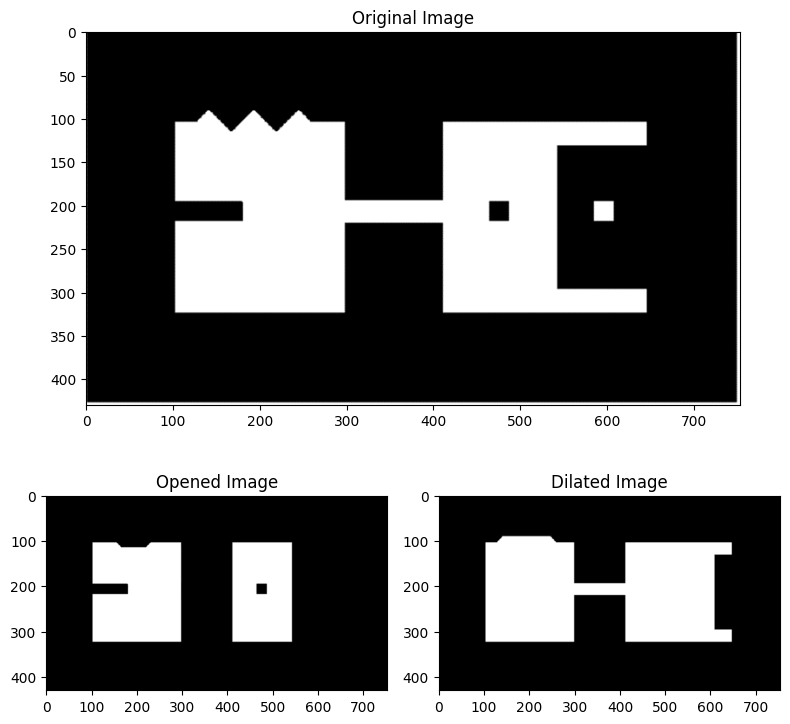

In [13]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 2, (1, 2))
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.subplot(2, 2, 3)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened Image')
plt.subplot(2, 2, 4)
plt.imshow(closed_image, cmap='gray')
plt.title('Dilated Image')

plt.tight_layout()
plt.show()